In [59]:
import pandas as pd

In [60]:
csv_file_path = "AAPL_data.csv" 
stock_data =  pd.read_csv(csv_file_path) 
print(stock_data.head())

         date     open     high      low    close     volume  Name
0  2013-02-08  67.7142  68.4014  66.8928  67.8542  158168416  AAPL
1  2013-02-11  68.0714  69.2771  67.6071  68.5614  129029425  AAPL
2  2013-02-12  68.5014  68.9114  66.8205  66.8428  151829363  AAPL
3  2013-02-13  66.7442  67.6628  66.1742  66.7156  118721995  AAPL
4  2013-02-14  66.3599  67.3771  66.2885  66.6556   88809154  AAPL


In [61]:
#Data Exploration


In [62]:
stock_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    1259 non-null   object 
 1   open    1259 non-null   float64
 2   high    1259 non-null   float64
 3   low     1259 non-null   float64
 4   close   1259 non-null   float64
 5   volume  1259 non-null   int64  
 6   Name    1259 non-null   object 
dtypes: float64(4), int64(1), object(2)
memory usage: 69.0+ KB


In [63]:
stock_data.isnull().sum()

date      0
open      0
high      0
low       0
close     0
volume    0
Name      0
dtype: int64

In [64]:
stock_data = stock_data.dropna()  

In [65]:
stock_data.fillna('')

,date,open,high,low,close,volume,Name
0,2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL
1,2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL
2,2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL
3,2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL
4,2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL
...,...,...,...,...,...,...,...
1254,2018-02-01,167.1650,168.6200,166.7600,167.7800,47230787,AAPL
1255,2018-02-02,166.0000,166.8000,160.1000,160.5000,86593825,AAPL
1256,2018-02-05,159.1000,163.8800,156.0000,156.4900,72738522,AAPL
1257,2018-02-06,154.8300,163.7200,154.0000,163.0300,68243838,AAPL


In [66]:
# - Import data into the database management system (online, offline). 
# - Execute query commands in SQL language to understand the stock market.


In [67]:
import sqlite3 
import csv
con = sqlite3.connect("stock_market.db")
cur = con.cursor()

In [68]:
con = sqlite3.connect('stocks.db')
cur = con.cursor()

cur.execute('''DROP TABLE IF EXISTS StockMarket''')
cur.execute('''CREATE TABLE IF NOT EXISTS StockMarket (
                Name TEXT,
                Date DATE,
                open REAL,
                high REAL,
                low REAL,
                close REAL,
                volume INTEGER,
                PRIMARY KEY (Name, Date)
               )''')

with open('AAPL_data.csv', 'r') as file:
    dr = csv.DictReader(file)
    to_db = [(i['Name'], i['date'], 
              float(i.get('open', 0)),
              float(i.get('high', 0)),
              float(i.get('low', 0)),
              float(i.get('close', 0)),
              int(i.get('volume', 0)))
             for i in dr]

cur.executemany('''INSERT INTO StockMarket (Name, Date, open, high, low, close, volume) 
                   VALUES (?, ?, ?, ?, ?, ?, ?);''', to_db)

con.commit()

def execute_and_print(query, description):
    print(f"\n{description}:")
    cur.execute(query)
    rows = cur.fetchall()
    if rows:
        for row in rows:
            print(row)
    else:
        print(0)

execute_and_print('SELECT * FROM StockMarket LIMIT 5', 'First 5 rows of StockMarket')




First 5 rows of StockMarket:
('AAPL', '2013-02-08', 67.7142, 68.4014, 66.8928, 67.8542, 158168416)
('AAPL', '2013-02-11', 68.0714, 69.2771, 67.6071, 68.5614, 129029425)
('AAPL', '2013-02-12', 68.5014, 68.9114, 66.8205, 66.8428, 151829363)
('AAPL', '2013-02-13', 66.7442, 67.6628, 66.1742, 66.7156, 118721995)
('AAPL', '2013-02-14', 66.3599, 67.3771, 66.2885, 66.6556, 88809154)


In [69]:
# Retrieve Historical Stock Prices
execute_and_print("SELECT Date,open,close FROM StockMarket WHERE Name = 'AAPL' ORDER BY Date DESC",
                   "Retrieve Historical Stock Prices")


Retrieve Historical Stock Prices:
('2018-02-07', 163.085, 159.54)
('2018-02-06', 154.83, 163.03)
('2018-02-05', 159.1, 156.49)
('2018-02-02', 166.0, 160.5)
('2018-02-01', 167.165, 167.78)
('2018-01-31', 166.87, 167.43)
('2018-01-30', 165.525, 166.97)
('2018-01-29', 170.16, 167.96)
('2018-01-26', 172.0, 171.51)
('2018-01-25', 174.505, 171.11)
('2018-01-24', 177.25, 174.22)
('2018-01-23', 177.3, 177.04)
('2018-01-22', 177.3, 177.0)
('2018-01-19', 178.61, 178.46)
('2018-01-18', 179.37, 179.26)
('2018-01-17', 176.15, 179.1)
('2018-01-16', 177.9, 176.19)
('2018-01-12', 176.18, 177.09)
('2018-01-11', 174.59, 175.28)
('2018-01-10', 173.16, 174.29)
('2018-01-09', 174.55, 174.33)
('2018-01-08', 174.35, 174.35)
('2018-01-05', 173.44, 175.0)
('2018-01-04', 172.54, 173.03)
('2018-01-03', 172.53, 172.23)
('2018-01-02', 170.16, 172.26)
('2017-12-29', 170.52, 169.23)
('2017-12-28', 171.0, 171.08)
('2017-12-27', 170.1, 170.6)
('2017-12-26', 170.8, 170.57)
('2017-12-22', 174.68, 175.01)
('2017-12-21',

In [76]:
execute_and_print("SELECT AVG(close) as average_closing_price FROM StockMarket",
                   "Average Closing Price")


Average Closing Price:
(109.06669849086576,)


In [77]:
execute_and_print("SELECT MAX(close) as highest_price, MIN(close) as lowest_price FROM StockMarket WHERE  Name = 'AAPL' ",
                   "Highest and Lowest Prices")


Highest and Lowest Prices:
(179.26, 55.7899)


In [78]:
execute_and_print("SELECT Date, close - LAG(close) OVER (ORDER BY Date) as price_change FROM StockMarket WHERE Name in ('AAPL') GROUP BY Name",
                   "Compare Perfomance")


Compare Perfomance:
('2013-02-08', None)


In [79]:
#Cleanning


In [80]:
duplicates = stock_data.duplicated()

print(f'Number of duplicate rows: {duplicates.sum()}')



Number of duplicate rows: 0


In [81]:
import pandas as pd


duplicates = stock_data.duplicated()

duplicate_rows = stock_data[duplicates]

num_duplicates = duplicate_rows.shape[0]
print(f'Number of duplicate rows: {num_duplicates}')

print(duplicate_rows)

Number of duplicate rows: 0
Empty DataFrame
Columns: [Date, Open, Close, High, Low, Volume, Name]
Index: []


In [82]:
stock_data.columns = ['Date', 'Open', 'Close', 'High', 'Low', 'Volume','Name']


In [46]:
print("Updated column names:", stock_data.columns)


Updated column names: Index(['date', 'open', 'high', 'low', 'close', 'volume', 'Name', 'Date'], dtype='object')


In [83]:
#Data Analysis

In [84]:
print(stock_data.describe())
stock_data['Date'] = pd.to_datetime(stock_data['Date'])


              Open        Close         High          Low        Volume
count  1259.000000  1259.000000  1259.000000  1259.000000  1.259000e+03
mean    109.055429   109.951118   108.141589   109.066698  5.404790e+07
std      30.549220    30.686186    30.376224    30.556812  3.346835e+07
min      55.424200    57.085700    55.014200    55.789900  1.147592e+07
25%      84.647800    85.334950    84.250650    84.830650  2.969438e+07
50%     108.970000   110.030000   108.050000   109.010000  4.566893e+07
75%     127.335000   128.100000   126.290000   127.120000  6.870872e+07
max     179.370000   180.100000   178.250000   179.260000  2.668336e+08


In [85]:
stock_data['Moving_Avg'] = stock_data['Close'].rolling(window=20).mean()


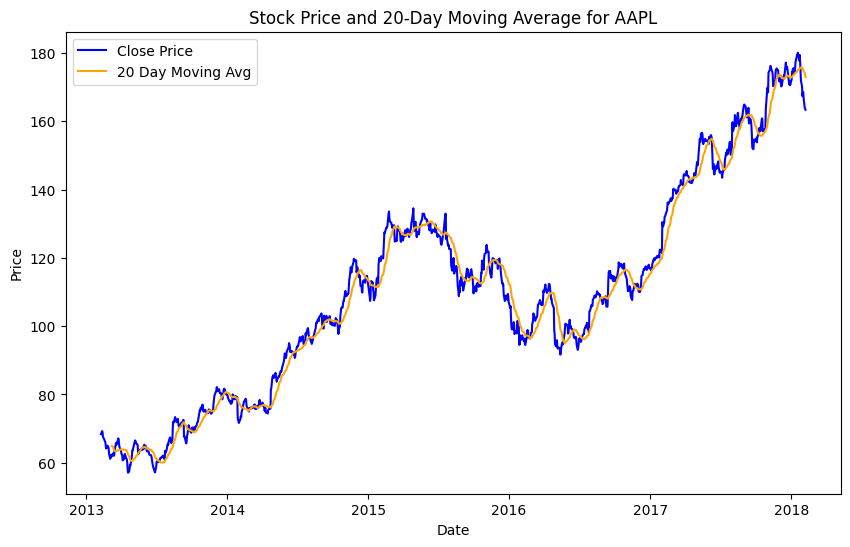

In [86]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression


company_name = 'AAPL'
company_data = stock_data[stock_data['Name'] == company_name]

plt.figure(figsize=(10, 6))
plt.plot(company_data['Date'], company_data['Close'], label='Close Price', color='blue')
plt.plot(company_data['Date'], company_data['Moving_Avg'], label='20 Day Moving Avg', color='orange')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title(f'Stock Price and 20-Day Moving Average for {company_name}')
plt.legend()
plt.show()


Mean Squared Error: 0.44251068032243157
R² Score: 0.9995235805703022


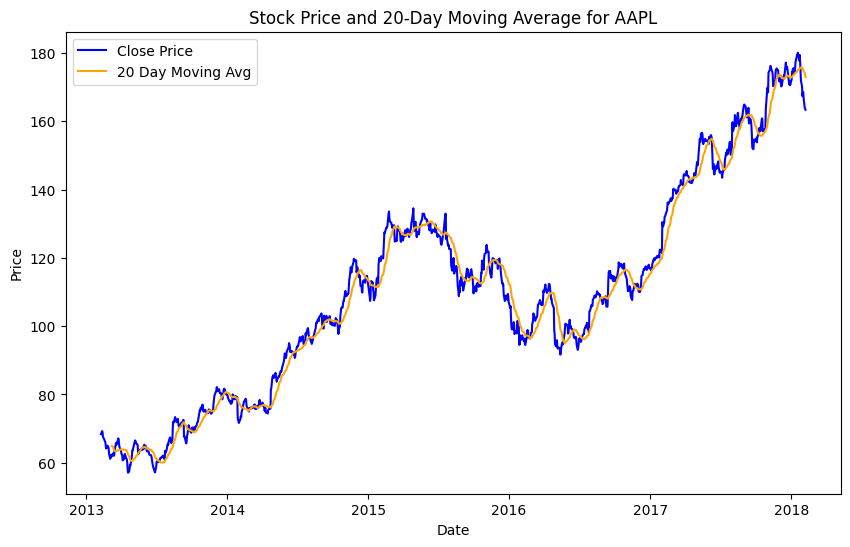

In [87]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split


stock_data['Moving_Avg'] = stock_data['Close'].rolling(window=20).mean()


X = stock_data[['Open', 'High', 'Volume']]  
y = stock_data['Close']  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

# Predicting
y_pred = model.predict(X_test)

# Calculate Mean Squared Error and R² Score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R² Score: {r2}")

company_name = 'AAPL'
company_data = stock_data[stock_data['Name'] == company_name]

plt.figure(figsize=(10, 6))
plt.plot(company_data['Date'], company_data['Close'], label='Close Price', color='blue')
plt.plot(company_data['Date'], company_data['Moving_Avg'], label='20 Day Moving Avg', color='orange')

plt.xlabel('Date')
plt.ylabel('Price')
plt.title(f'Stock Price and 20-Day Moving Average for {company_name}')

plt.legend()
plt.show()



In [88]:
print(company_data.head())


        Date     Open    Close     High      Low     Volume  Name  Moving_Avg
0 2013-02-08  67.7142  68.4014  66.8928  67.8542  158168416  AAPL         NaN
1 2013-02-11  68.0714  69.2771  67.6071  68.5614  129029425  AAPL         NaN
2 2013-02-12  68.5014  68.9114  66.8205  66.8428  151829363  AAPL         NaN
3 2013-02-13  66.7442  67.6628  66.1742  66.7156  118721995  AAPL         NaN
4 2013-02-14  66.3599  67.3771  66.2885  66.6556   88809154  AAPL         NaN


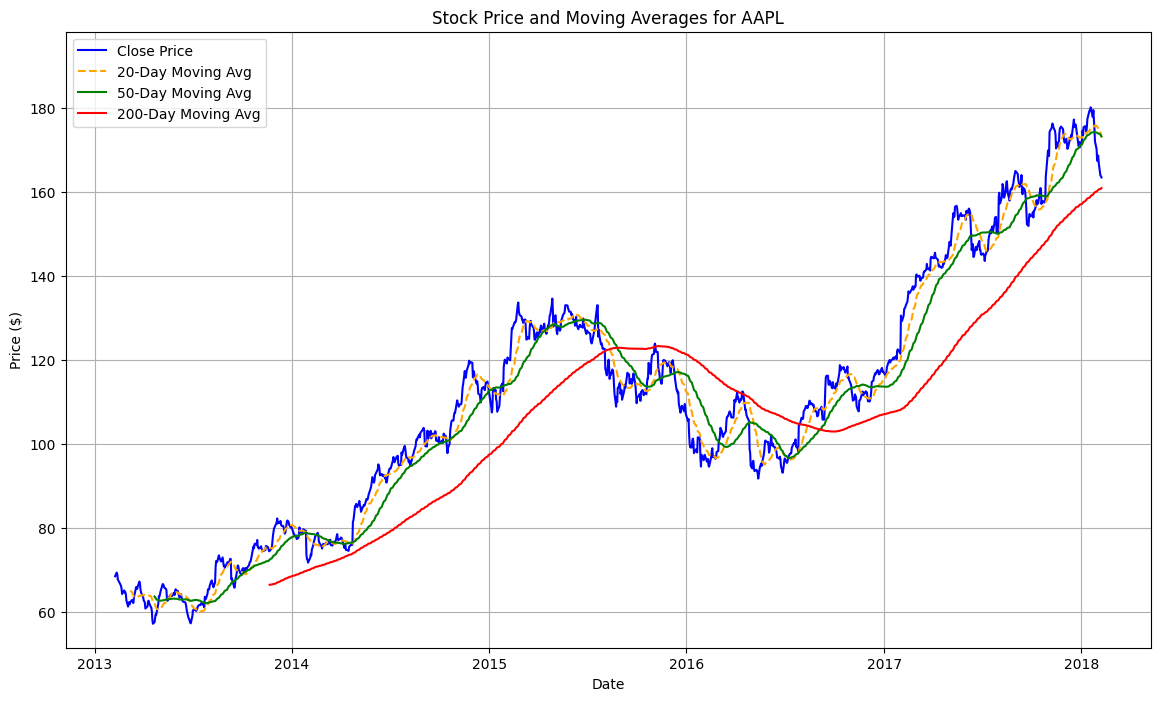

In [89]:
import matplotlib.pyplot as plt
import pandas as pd


company_name = 'AAPL'

company_data = stock_data[stock_data['Name'] == company_name].copy()

company_data['Date'] = pd.to_datetime(company_data['Date'], errors='coerce')
company_data.sort_values(by='Date', inplace=True)

company_data.dropna(subset=['Date', 'Close'], inplace=True)

company_data['Close'].dropna()  

def calculate_moving_average(data, window):
    if len(data) >= window:
        return data.rolling(window=window).mean()
    else:
        return pd.Series([None] * len(data))

company_data['20_MA'] = calculate_moving_average(company_data['Close'], 20)
company_data['50_MA'] = calculate_moving_average(company_data['Close'], 50)
company_data['200_MA'] = calculate_moving_average(company_data['Close'], 200)

Q1 = company_data['Close'].quantile(0.25)
Q3 = company_data['Close'].quantile(0.75)
IQR = Q3 - Q1
outlier_threshold = 1.5 * IQR

filtered_data = company_data[
    (company_data['Close'] >= Q1 - outlier_threshold) & 
    (company_data['Close'] <= Q3 + outlier_threshold)
]

plt.figure(figsize=(14, 8))
plt.plot(filtered_data['Date'], filtered_data['Close'], label='Close Price', color='blue', linewidth=1.5)
plt.plot(filtered_data['Date'], filtered_data['20_MA'], label='20-Day Moving Avg', color='orange', linestyle='--')
plt.plot(filtered_data['Date'], filtered_data['50_MA'], label='50-Day Moving Avg', color='green')
plt.plot(filtered_data['Date'], filtered_data['200_MA'], label='200-Day Moving Avg', color='red')
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.title(f'Stock Price and Moving Averages for {company_name}')
plt.legend()
plt.grid(True)

plt.ylim(filtered_data['Close'].min() * 0.9, filtered_data['Close'].max() * 1.1)

plt.show()


In [90]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X = stock_data[['Open', 'High', 'Low', 'Volume']]
y = stock_data['Close']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

predictions = model.predict(X_test)

print(predictions[:10])  


[ 64.80859587 139.51086734  62.13722712 110.77631893 129.04050467
  60.35574778 116.09901467 176.77255605 102.89847896 119.28352643]
